In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import acos, degrees
from scipy.signal import find_peaks
import os.path
import glob
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import entropy
import pylab as pl
from numpy.fft import fft
from scipy import stats
import numpy
from scipy import signal



In [56]:
chunk_width = 250


In [57]:
#Function to extract angle using 3 points coordinate
def angle3pt(a, b, c):
#    """Counterclockwise angle in degrees by turning from c to a around b
#        Returns a float between 0.0 and 360.0"""
    ang = math.degrees(
    math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
    return ang + 360 if ang < 0 else ang


In [58]:
def getridofAngleJumps(alpha):
    alpha_rad = [x*(np.pi)/180 for x in alpha]
    alpha_rad = np.array(alpha_rad)
    alpha_rad[~np.isnan(alpha_rad)] = np.unwrap(alpha_rad[~np.isnan(alpha_rad)])
    alpha_unwrap= np.degrees(alpha_rad)
    return alpha_unwrap

In [60]:
def smooth_acausal(x,frequency = 0.300):
    #b, a = signal.butter(8, 0.150)
    sos = signal.butter(4, frequency, output='sos')
    y = signal.sosfiltfilt(sos, x)
    return y

In [61]:
def smooth(x,window_len=20,window='hanning'):
#    smooth the data using a window with requested size.  
#    This method is based on the convolution of a scaled window with the signal.

    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y


In [62]:
#Function to extract RidgeX trajectory from excel file
def RidgeX_excel_to_array_preprocessed(file_path, chunk_width, trial_no):
    #Read csv file tail markers
    RidgeX = pd.read_csv(file_path[trial_no])

    #take just numeric values
    RidgeX=pd.to_numeric(RidgeX.iloc[:,0])

 
    return smooth(RidgeX.values)


In [63]:
#Function to plot tail angle trajectory
def plot_TailAngle(file_path, chunk_width, i, c):
    #Read csv file tail markers
    df = pd.read_csv(file_path[i])
#    df = pd.read_csv(file_path)
    #Rename marker columns
    df.rename(columns={'DLC_resnet50_Ridge_walkMay27shuffle1_1000000':'tail1_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.1':'tail1_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.2':'tail1_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.3':'tail2_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.4':'tail2_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.5':'tail2_lik',                       
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.6':'tail3_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.7':'tail3_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.8':'tail3_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.9':'tail4_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.10':'tail4_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.11':'tail4_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.12':'tail5_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.13':'tail5_y',                       
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.14':'tail5_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.15':'tail6_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.16':'tail6_y',  
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.17':'tail6_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.18':'tail7_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.19':'tail7_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.20':'tail7_lik',                       
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.21':'tail8_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.22':'tail8_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.23':'tail8_lik'}, 
                 inplace=True)

    #take just numeric values
    df.tail1_x=pd.to_numeric(df.tail1_x[c-chunk_width:c+chunk_width])
    df.tail1_y=pd.to_numeric(df.tail1_y[c-chunk_width:c+chunk_width])
    df.tail1_lik=pd.to_numeric(df.tail1_lik[c-chunk_width:c+chunk_width])
    df.tail2_x=pd.to_numeric(df.tail2_x[c-chunk_width:c+chunk_width])
    df.tail2_y=pd.to_numeric(df.tail2_y[c-chunk_width:c+chunk_width])
    df.tail2_lik=pd.to_numeric(df.tail2_lik[c-chunk_width:c+chunk_width])
    df.tail3_x=pd.to_numeric(df.tail3_x[c-chunk_width:c+chunk_width])
    df.tail3_y=pd.to_numeric(df.tail3_y[c-chunk_width:c+chunk_width])
    df.tail3_lik=pd.to_numeric(df.tail3_lik[c-chunk_width:c+chunk_width])
    df.tail4_x=pd.to_numeric(df.tail4_x[c-chunk_width:c+chunk_width])
    df.tail4_y=pd.to_numeric(df.tail4_y[c-chunk_width:c+chunk_width])
    df.tail4_lik=pd.to_numeric(df.tail4_lik[c-chunk_width:c+chunk_width])
    df.tail5_x=pd.to_numeric(df.tail5_x[c-chunk_width:c+chunk_width])
    df.tail5_y=pd.to_numeric(df.tail5_y[c-chunk_width:c+chunk_width])
    df.tail5_lik=pd.to_numeric(df.tail5_lik[c-chunk_width:c+chunk_width])
    df.tail6_x=pd.to_numeric(df.tail6_x[c-chunk_width:c+chunk_width])
    df.tail6_y=pd.to_numeric(df.tail6_y[c-chunk_width:c+chunk_width])
    df.tail6_lik=pd.to_numeric(df.tail6_lik[c-chunk_width:c+chunk_width])
    df.tail7_x=pd.to_numeric(df.tail7_x[c-chunk_width:c+chunk_width])
    df.tail7_y=pd.to_numeric(df.tail7_y[c-chunk_width:c+chunk_width])
    df.tail7_lik=pd.to_numeric(df.tail7_lik[c-chunk_width:c+chunk_width])
    df.tail8_x=pd.to_numeric(df.tail8_x[c-chunk_width:c+chunk_width])
    df.tail8_y=pd.to_numeric(df.tail8_y[c-chunk_width:c+chunk_width])
    df.tail8_lik=pd.to_numeric(df.tail8_lik[c-chunk_width:c+chunk_width])

    
    #substitute low likelihood points with NaN
    #df.tail1_x[]=np.nan
    lik_thresh = 0.05
    df.tail1_x.where((df.tail1_lik>lik_thresh),np.NaN,inplace=True)
    df.tail1_y.where((df.tail1_lik>lik_thresh),np.NaN,inplace=True)
    df.tail2_x.where((df.tail2_lik>lik_thresh),np.NaN,inplace=True)
    df.tail2_y.where((df.tail2_lik>lik_thresh),np.NaN,inplace=True)
    df.tail3_x.where((df.tail3_lik>lik_thresh),np.NaN,inplace=True)
    df.tail3_y.where((df.tail3_lik>lik_thresh),np.NaN,inplace=True)
    df.tail4_x.where((df.tail4_lik>lik_thresh),np.NaN,inplace=True)
    df.tail4_y.where((df.tail4_lik>lik_thresh),np.NaN,inplace=True)
    df.tail5_x.where((df.tail5_lik>lik_thresh),np.NaN,inplace=True)
    df.tail5_y.where((df.tail5_lik>lik_thresh),np.NaN,inplace=True)
    df.tail6_x.where((df.tail6_lik>lik_thresh),np.NaN,inplace=True)
    df.tail6_y.where((df.tail6_lik>lik_thresh),np.NaN,inplace=True)
    df.tail7_x.where((df.tail7_lik>lik_thresh),np.NaN,inplace=True)
    df.tail7_y.where((df.tail7_lik>lik_thresh),np.NaN,inplace=True)
    df.tail8_x.where((df.tail8_lik>lik_thresh),np.NaN,inplace=True)
    df.tail8_y.where((df.tail8_lik>lik_thresh),np.NaN,inplace=True)




    #Compute and plot tail angle in panda dataframe as last column
    angles1=[]
    angles2=[]
    angles3=[]
    angles4=[]
    angles5=[]
    angles6=[]
    angles7=[]

    for i in range(df.shape[0]):
        #x1,y1=df.tail1_x[i],df.tail1_y[i]
        vertical = np.array([df.tail1_x[i],df.tail1_y[i]+10])
        tail1 = np.array([df.tail1_x[i],df.tail1_y[i]])
        tail2 = np.array([df.tail2_x[i],df.tail2_y[i]])    
        tail3 = np.array([df.tail3_x[i],df.tail3_y[i]])
        tail4 = np.array([df.tail4_x[i],df.tail4_y[i]])
        tail5 = np.array([df.tail5_x[i],df.tail5_y[i]])    
        tail6 = np.array([df.tail6_x[i],df.tail6_y[i]])
        tail7 = np.array([df.tail7_x[i],df.tail7_y[i]])
        tail8 = np.array([df.tail8_x[i],df.tail8_y[i]])    

    #Change below to decide 3 points to determine angle
        angle1 = angle3pt(tail2, tail1, vertical)
        angle2 = angle3pt(tail3, tail1, vertical)
        angle3 = angle3pt(tail4, tail1, vertical)
        angle4 = angle3pt(tail5, tail1, vertical)
        angle5 = angle3pt(tail6, tail1, vertical)
        angle6 = angle3pt(tail7, tail1, vertical)
        angle7 = angle3pt(tail8, tail1, vertical)
        
        #Append
        angles1.append(round(angle1,2))
        angles2.append(round(angle2,2))
        angles3.append(round(angle3,2))
        angles4.append(round(angle4,2))
        angles5.append(round(angle5,2))
        angles6.append(round(angle6,2))
        angles7.append(round(angle7,2))

    df['Angles1']=angles1
    df.head()
    df['Angles2']=angles2
    df.head()
    df['Angles3']=angles3
    df.head()
    df['Angles4']=angles4
    df.head()
    df['Angles5']=angles5
    df.head()
    df['Angles6']=angles6
    df.head()
    df['Angles7']=angles7
    df.head()
    #Create a list comprehension by chunking x (centroid X trajectory) in 'chunk_width' frames and alpha (tail angle traj)
    #x = CentroidXY.X
    alpha1 = df.Angles1
    alpha2 = df.Angles2
    alpha3 = df.Angles3
    alpha4 = df.Angles4
    alpha5 = df.Angles5
    alpha6 = df.Angles6
    alpha7 = df.Angles7

    #Get alpha value at perturbation time to centre the trace to that value
#    alpha_centred = alpha[tot_peaks]
    #Apply function to get rid of angle jumps
    alpha1 = smooth(getridofAngleJumps(alpha1))
    alpha2 = smooth(getridofAngleJumps(alpha2))
    alpha3 = smooth(getridofAngleJumps(alpha3))
    alpha4 = smooth(getridofAngleJumps(alpha4))
    alpha5 = smooth(getridofAngleJumps(alpha5))
    alpha6 = smooth(getridofAngleJumps(alpha6))
    alpha7 = smooth(getridofAngleJumps(alpha7))

    return alpha1, alpha2, alpha3, alpha4, alpha5, alpha6, alpha7

In [64]:
#Function to plot Right Paw angle trajectory
def plot_RPAngle(file_path, chunk_width, trial_no):
    #Read csv file tail markers
    df = pd.read_csv(file_path[trial_no])
#    df = pd.read_csv(file_path)

    #Rename marker columns
    df.rename(columns={'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.24':'LP_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.25':'LP_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.26':'LP_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.36':'RA_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.37':'RA_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.38':'RA_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.39':'RP_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.40':'RP_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.41':'RP_lik'}, 
                 inplace=True)

    #take just numeric values
    df.RA_x=pd.to_numeric(df.RA_x[2:])
    df.RA_y=pd.to_numeric(df.RA_y[2:])
    df.RP_x=pd.to_numeric(df.RP_x[2:])
    df.RP_y=pd.to_numeric(df.RP_y[2:])
    df.LP_x=pd.to_numeric(df.LP_x[2:])
    df.LP_y=pd.to_numeric(df.LP_y[2:])
    df.RA_lik=pd.to_numeric(df.RA_lik[2:])
    df.RP_lik=pd.to_numeric(df.RP_lik[2:])
    df.LP_lik=pd.to_numeric(df.LP_lik[2:])

    
    #substitute low likelihood points with NaN
    #df.tail1_x[]=np.nan
    lik_thresh = 0.1
    df.RA_x.where((df.RA_lik>lik_thresh),np.NaN,inplace=True)
    df.RA_y.where((df.RA_lik>lik_thresh),np.NaN,inplace=True)
    df.RP_x.where((df.RP_lik>lik_thresh),np.NaN,inplace=True)
    df.RP_y.where((df.RP_lik>lik_thresh),np.NaN,inplace=True)
    df.LP_x.where((df.LP_lik>lik_thresh),np.NaN,inplace=True)
    df.LP_y.where((df.LP_lik>lik_thresh),np.NaN,inplace=True)
    
    #extract RP x and LP x
    RP_x =  df.RP_x
    LP_x =  df.LP_x




    #Compute and plot tail angle in panda dataframe as last column
    angles=[]
    for i in range(df.shape[0]):
        vertical = np.array([df.RA_x[i],df.RA_y[i]+10])
        RA = np.array([df.RA_x[i],df.RA_y[i]])
        RP = np.array([df.RP_x[i],df.RP_y[i]])

        angle = angle3pt(RP, RA, vertical)
        #Append
        angles.append(round(angle,2))
    df['Angles']=angles
    df.head()
    
    #Create a list comprehension by chunking x (centroid X trajectory) in 'chunk_width' frames and alpha (tail angle traj)
    #x = CentroidXY.X
    alpha = df.Angles
    #Get alpha value at perturbation time to centre the trace to that value
#    alpha_centred = alpha[tot_peaks]
    #Apply function to get rid of angle jumps
    alpha = getridofAngleJumps(alpha)
    #Apply function to smooth
    alpha = smooth(alpha)

#!    return [TailAngle_traj, alpha]
    return [alpha, smooth(RP_x), smooth(LP_x)]

In [65]:
#Function to plot Right Paw angle trajectory
def plot_LPAngle(file_path, chunk_width, trial_no):
    #Read csv file tail markers
    df = pd.read_csv(file_path[trial_no])
#    df = pd.read_csv(file_path)

    #Rename marker columns
    df.rename(columns={'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.24':'LP_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.25':'LP_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.26':'LP_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.27':'LA_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.28':'LA_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.29':'LA_lik',
                       
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.36':'RA_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.37':'RA_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.38':'RA_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.39':'RP_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.40':'RP_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.41':'RP_lik'}, 
                 inplace=True)

    #take just numeric values
    df.RA_x=pd.to_numeric(df.RA_x[2:])
    df.LA_x=pd.to_numeric(df.LA_x[2:])

    df.RA_y=pd.to_numeric(df.RA_y[2:])
    df.LA_y=pd.to_numeric(df.LA_y[2:])

    df.RP_x=pd.to_numeric(df.RP_x[2:])
    df.RP_y=pd.to_numeric(df.RP_y[2:])
    df.LP_x=pd.to_numeric(df.LP_x[2:])
    df.LP_y=pd.to_numeric(df.LP_y[2:])
    
    df.RA_lik=pd.to_numeric(df.RA_lik[2:])
    df.LA_lik=pd.to_numeric(df.LA_lik[2:])
    df.RP_lik=pd.to_numeric(df.RP_lik[2:])
    df.LP_lik=pd.to_numeric(df.LP_lik[2:])

    
    #substitute low likelihood points with NaN
    #df.tail1_x[]=np.nan
    lik_thresh = 0.1
    df.RA_x.where((df.RA_lik>lik_thresh),np.NaN,inplace=True)
    df.LA_x.where((df.LA_lik>lik_thresh),np.NaN,inplace=True)

    df.RA_y.where((df.RA_lik>lik_thresh),np.NaN,inplace=True)
    df.LA_y.where((df.LA_lik>lik_thresh),np.NaN,inplace=True)

    df.RP_x.where((df.RP_lik>lik_thresh),np.NaN,inplace=True)
    df.RP_y.where((df.RP_lik>lik_thresh),np.NaN,inplace=True)
    df.LP_x.where((df.LP_lik>lik_thresh),np.NaN,inplace=True)
    df.LP_y.where((df.LP_lik>lik_thresh),np.NaN,inplace=True)
    
    #extract RP x and LP x
    RP_x =  df.RP_x
    LP_x =  df.LP_x




    #Compute and plot tail angle in panda dataframe as last column
    angles=[]
    for i in range(df.shape[0]):
        vertical = np.array([df.LA_x[i],df.LA_y[i]+10])
        LA = np.array([df.LA_x[i],df.LA_y[i]])
        LP = np.array([df.LP_x[i],df.LP_y[i]])

        angle = angle3pt(LP, LA, vertical)
        #Append
        angles.append(round(angle,2))
    df['Angles']=angles
    df.head()
    
    #Create a list comprehension by chunking x (centroid X trajectory) in 'chunk_width' frames and alpha (tail angle traj)
    alpha = df.Angles
    #Get alpha value at perturbation time to centre the trace to that value
    #Apply function to get rid of angle jumps
    alpha = getridofAngleJumps(alpha)
    #Apply function to smooth
    alpha = smooth(alpha)

    return [alpha, smooth(RP_x), smooth(LP_x)]

In [66]:
#Function to plot Right Paw angle trajectory
def plot_HipAngle(file_path, chunk_width, trial_no):
    #Read csv file tail markers
    df = pd.read_csv(file_path[trial_no])
#    df = pd.read_csv(file_path)

    #Rename marker columns
    df.rename(columns={'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.30':'LH_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.31':'LH_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.32':'LH_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.33':'RH_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.34':'RH_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.35':'RH_lik'}, 
                 inplace=True)

    #take just numeric values
    df.LH_x=pd.to_numeric(df.LH_x[2:])
    df.LH_y=pd.to_numeric(df.LH_y[2:])
    df.RH_x=pd.to_numeric(df.RH_x[2:])
    df.RH_y=pd.to_numeric(df.RH_y[2:])
    df.RH_lik=pd.to_numeric(df.RH_lik[2:])
    df.LH_lik=pd.to_numeric(df.LH_lik[2:])

    
    #substitute low likelihood points with NaN
    #df.tail1_x[]=np.nan
    lik_thresh = 0.1
    df.LH_x.where((df.LH_lik>lik_thresh),np.NaN,inplace=True)
    df.LH_y.where((df.LH_lik>lik_thresh),np.NaN,inplace=True)
    df.RH_x.where((df.RH_lik>lik_thresh),np.NaN,inplace=True)
    df.RH_y.where((df.RH_lik>lik_thresh),np.NaN,inplace=True)

    
    #extract RP x and LP x
    LH_x =  df.LH_x
    LH_y =  df.LH_y
    RH_x =  df.RH_x    
    RH_y =  df.RH_y




    #Compute and plot tail angle in panda dataframe as last column
    angles=[]
    for i in range(df.shape[0]):
        vertical = np.array([df.RH_x[i],df.RH_y[i]+10])
        RH = np.array([df.RH_x[i],df.RH_y[i]])
        LH = np.array([df.LH_x[i],df.LH_y[i]])

        angle = angle3pt(LH, RH, vertical)
        #Append
        angles.append(round(angle,2))
    df['Angles']=angles
    df.head()
    
    #Create a list comprehension by chunking x (centroid X trajectory) in 'chunk_width' frames and alpha (tail angle traj)
    #x = CentroidXY.X
    alpha = df.Angles
    #Get alpha value at perturbation time to centre the trace to that value
#    alpha_centred = alpha[tot_peaks]
    #Apply function to get rid of angle jumps
    alpha = getridofAngleJumps(alpha)
    #Apply function to smooth
    alpha = smooth(alpha)
#    TailAngle_traj = alpha[tot_peaks-chunk_width:tot_peaks+chunk_width]-[alpha[tot_peaks]-alpha_centred]# for i in tot_peaks]
#    RP_x = RP_x[tot_peaks-chunk_width:tot_peaks+chunk_width]-[RP_x[tot_peaks]]
#    LP_x = LP_x[tot_peaks-chunk_width:tot_peaks+chunk_width]-[LP_x[tot_peaks]]

#!    return [TailAngle_traj, alpha]
    return alpha

In [67]:
#Function to extract centroid X Y trajectory
def extract_Centroid(file_path, chunk_width, trial_no):
    #Read csv file tail markers
    CentroidXY = pd.read_csv(file_path[trial_no])

    CentroidXY.rename(columns={'NaN':'X',
                              'NaN.1':'Y'}, 
                     inplace=True)
    #take just numeric values
    CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
    CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)

    #extract Centroid x and y
    CentroidX =  np.array(CentroidXY.Centroid_x)
    CentroidY =  np.array(CentroidXY.Centroid_y)
    return CentroidX, CentroidY


In [68]:
def find_delay(a, b):
    corr_a_b = np.correlate(a-np.mean(a), b-np.mean(b), mode = 'full')
    delay = np.where(corr_a_b == numpy.amin(corr_a_b))# -(np.size(corr_a_b)+1)/2
    return delay[0]-(np.size(corr_a_b)+1)/2

In [69]:
#Function to plot Right Paw angle trajectory
def plot_Centroid_edge_dist(file_path, chunk_width, i):
    #Read csv file tail markers
    df = pd.read_csv(file_path[i])

##Open Centroid file from top camera
#CentroidXY = pd.read_csv('C:/Users/Salvo/Desktop/Ridge/DLC_videos/Videos_to_analyzeDLC/Ridge_MiceS20-S24_16thApril/perturbation_8mm_1/8_S22/Centroid.csv')

    #Select 1st column csv file
    matrix2 = df[df.columns[0]]#.as_matrix()
    Centroid1stcol = matrix2.tolist() #file 1st column


#    CentroidXY.rename(columns={'NaN':'dist'}, 
#                     inplace=True)
    #take just numeric values
    Centroid1stcol = np.array(pd.to_numeric(Centroid1stcol))
#    CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)

    #extract Centroid x and y
#    CentroidX =  CentroidXY.Centroid_x
#    CentroidY =  CentroidXY.Centroid_y
    
#    Centroid_list = CentroidX[tot_peaks-chunk_width:tot_peaks+centr_rang-chunk_width]#-[CentroidX[tot_peaks]]
    
#    Centroid_list = CentroidX[tot_peaks-chunk_width-100:tot_peaks-100]-[CentroidX[tot_peaks-100]]
    return smooth(Centroid1stcol)

In [70]:
#np.arange(len(file_to_open)-25)


In [71]:

def firstNonNan(listfloats):
    i = 0
    for item in listfloats:
        i += 1
        if math.isnan(item) == False:
            return i

#firstNonNan(t)

In [72]:
def HIST_MI_2_var(a, b):
    fig = plt.figure(figsize=(10,14))
    ax1 = plt.subplot(311)
    ax2 = plt.subplot(312)
    hist_centr = ax1.hist(a, density=True, bins=30, color = 'orange')  # `density=False` would make counts
    hist_tail = ax2.hist(b, density=True, bins=30, color = 'blue')  # `density=False` would make counts
#    ent_cent = entropy(hist_centr[0], base=2)
#    ent_tail = entropy(hist_tail[0], base=2)
    MI_cent_tail = metrics.mutual_info_score(hist_centr[0], hist_tail[0])
    return MI_cent_tail

In [73]:
def get_delay_array(var1, var2):
    var1 = var1[~np.isnan(var1)] #centroid
    var2 = var2[~np.isnan(var2)] #TA
    #take the mean out
#    var1 = var1-np.mean(var1)
#    var2 = var2-np.mean(var2)

    corr_a_b = np.correlate(var1, var2, mode = 'full')
    #norm_corr_a_b = np.correlate(var2/np.std(var2), var1/np.std(var1), mode = 'full')
    cc_trace_midpoint = len(corr_a_b)
    delay = np.argmax(abs(corr_a_b))-(cc_trace_midpoint/2)+1 #Get the delay of the absolute max peak
    max_peak = max(corr_a_b)#, key=abs)
#    max_peak = abs(max(corr_a_b, key=abs))
    return delay, max_peak

In [74]:
def get_fft(chunk_width, data):
    # Number of sample points
    N = chunk_width*2
    # sample spacing
    T = 1/300
    x = np.linspace(0.0, N*T, N)
    y = data
    yf = fft(y)
    xf = np.linspace(0, 1/(2*T), N//2)
#    plt.plot(xf, 2/N * np.abs(yf[0:N//2]))
#    plt.grid()
#    plt.show()
    return xf, yf

In [75]:
def findpeaks_extractchunk(x_diff, x, y_r1, y_r2, y_r3, y_r4, y_r5, y_r6, y_r7, \
                           z, w, w_x, t, other_step_x, ba, threshold_height, chunk_width_step):
    peaks, _ = find_peaks(x_diff, height=threshold_height, distance = 50, prominence = 1)
    out_step = []
    out_TA = []
    out_HA = []
    out_cent = []
    out_RstepAng = []
    out_cent_X = []
    out_ba = []
    out_contra_step_x = []
    out_ta1_chunk = []
    out_ta2_chunk = [] 
    out_ta3_chunk = [] 
    out_ta4_chunk = [] 
    out_ta5_chunk = [] 
    out_ta6_chunk = [] 
    out_ta7_chunk = []
    for i in np.arange(len(peaks)):
        chunk_trial_step = x[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_contra_step = other_step_x[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_TA = y_r1[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_HA = z[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_cent = w[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_centX = w_x[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_RstepAng = t[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_BA = ba[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_TA1 = y_r1[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_TA2 = y_r2[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_TA3 = y_r3[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_TA4 = y_r4[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_TA5 = y_r5[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_TA6 = y_r6[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_TA7 = y_r7[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        

        out_step.append(chunk_trial_step)
        out_TA.append(chunk_trial_TA)
        out_HA.append(chunk_trial_HA)
        out_cent.append(chunk_trial_cent)
        out_cent_X.append(chunk_trial_centX)
        out_ba.append(chunk_trial_BA)
        out_contra_step_x.append(chunk_trial_contra_step)
        out_ta1_chunk.append(chunk_trial_TA1)
        out_ta2_chunk.append(chunk_trial_TA2)
        out_ta3_chunk.append(chunk_trial_TA3)
        out_ta4_chunk.append(chunk_trial_TA4)
        out_ta5_chunk.append(chunk_trial_TA5)
        out_ta6_chunk.append(chunk_trial_TA6)
        out_ta7_chunk.append(chunk_trial_TA7)
        #transpose all traces of step angle greater than 360 back to 0
        if np.nanmean(chunk_trial_RstepAng) > 250:
            out_RstepAng.append(chunk_trial_RstepAng-360)
        elif np.nanmean(chunk_trial_RstepAng) < -150:
            out_RstepAng.append(chunk_trial_RstepAng+360)   
        else:
            out_RstepAng.append(chunk_trial_RstepAng)


    
    return out_step, out_TA, out_HA, out_cent, out_cent_X, out_RstepAng, out_contra_step_x, out_ba, out_ta1_chunk, \
            out_ta2_chunk, out_ta3_chunk, out_ta4_chunk, out_ta5_chunk, out_ta6_chunk, out_ta7_chunk

In [76]:
import matplotlib.pyplot as plt
import matplotlib.text as mpl_text

class AnyObject(object):
    def __init__(self, text, color):
        self.my_text = text
        self.my_color = color

class AnyObjectHandler(object):
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        print(orig_handle)
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        patch = mpl_text.Text(x=0, y=0, text=orig_handle.my_text, color=orig_handle.my_color, verticalalignment=u'baseline', 
                                horizontalalignment=u'left', multialignment=None, 
                                fontproperties=None, rotation=45, linespacing=None, 
                                rotation_mode=None)
        handlebox.add_artist(patch)
        return patch

In [77]:
def delete_bad_traces_FromList(Traces_List, idx_to_eliminate):
    for l in np.arange(len(idx_to_eliminate)):
        for i in np.arange(len(Traces_List)):
            for j in np.arange(len(Traces_List[i])):
                if len(Traces_List[i][j]) == 200:
                    if i == idx_to_eliminate[l][0] and j == idx_to_eliminate[l][1]:
                        Traces_List[i][j] = [] 
    return Traces_List

In [78]:
def check_trace(trace):
    if np.nanmean(trace) <-50:
        trace = trace + 360
#    if np.nanmean(trace) >400:
#        trace = trace - 360
    return trace

In [79]:
def check_trace_within_0_to_150(trace):
    if np.nanmean(trace) <-50:
        trace = trace + 360
        if np.nanmean(trace) <-50:
            trace = trace + 360
#    elif np.nanmean(trace[0:60]) >150:
#        trace = []
    else:
        trace = trace
    return trace

In [80]:
def fill_nan(arr):
#     mask = np.isnan(arr)
#     idx = np.where(~mask,np.arange(mask.size),0)
#     np.maximum.accumulate(idx, out=idx)
#     arr[mask] = arr[idx]
    df = pd.DataFrame(data=arr.flatten())
    df = df.fillna(value=None, method='backfill', axis=None, limit=70, downcast=None)
    arr = df.values
#    print(type(arr))
    return arr.ravel()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # This is added back by InteractiveShellApp.init_path()
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: Mean of empty slice
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: Mean of empty slice


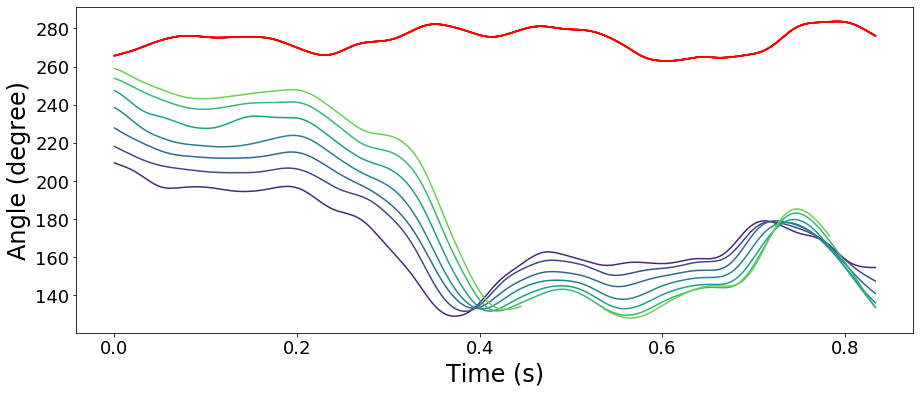

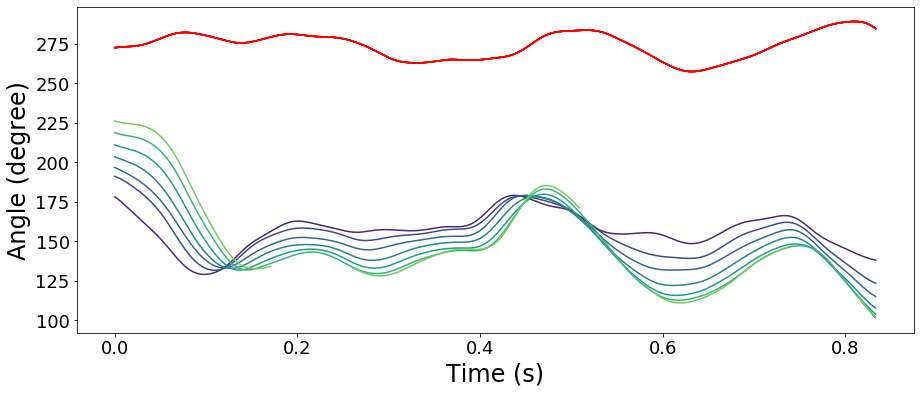

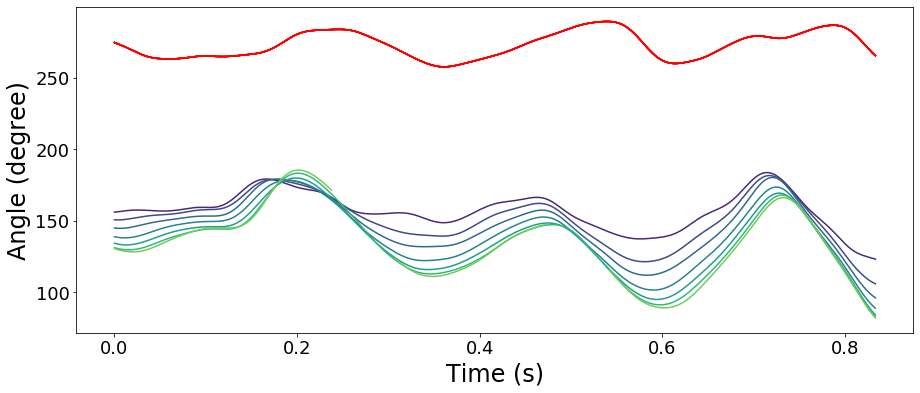

In [136]:
### Organize all data into python dict
from collections import defaultdict

search_key_path = ['*4mm*', '*_5mm*', '*8mm*', '*10mm*']
search_key = ['4mm', '5mm', '8mm', '10mm']

dict_ridge_all = defaultdict(dict)
for j in np.arange(len(search_key)):
    data_location = "R://UusisaariU//PROCESSED_DATA_BACKUPS//nRIM_MEMBERS//Salvo//RD_all_cond//RD_all_cond_analyzed//"
    RidgeX_ExcelList_to_open = glob.glob(os.path.join(os.path.sep, data_location, search_key_path[j], 'Ridge_X//*.csv'))
    TA_ExcelList_to_open = glob.glob(os.path.join(os.path.sep, data_location, search_key_path[j], 'side_cam//*//*.csv'))
    Centroid_ExcelList_to_open = glob.glob(os.path.join(os.path.sep, data_location, search_key_path[j], 'Centroid_XY//*.csv'))
    BodyAxis_ExcelList_to_open = glob.glob(os.path.join(os.path.sep, data_location, search_key_path[j], 'BodyAxis//*.csv'))

#    print(RidgeX_ExcelList_to_open)
#    dict_ridge = {}
    for i in np.arange(len(RidgeX_ExcelList_to_open)): # len(peaks)
        #Extract arrays
        RidgeX_traj = RidgeX_excel_to_array_preprocessed(RidgeX_ExcelList_to_open, chunk_width, i)
        CentroidX_traj, CentroidY_traj = extract_Centroid(Centroid_ExcelList_to_open, chunk_width, i)
        BodyAxis_traj = RidgeX_excel_to_array_preprocessed(BodyAxis_ExcelList_to_open, chunk_width, i)
        #Extract traces of Centroid and Tail Angle around the time frame when the mouse is at the ridge center
        a = firstNonNan(CentroidX_traj)
        b = round((np.size(CentroidX_traj) - np.count_nonzero(np.isnan(CentroidX_traj)))/2)
        c = a + b

        #Take tail angle traj after extracting chunk of traj of interest around c
        TA1, TA2, TA3, TA4, TA5, TA6, TA7 = plot_TailAngle(TA_ExcelList_to_open, chunk_width, i, c)

        RidgeX_traj_chunk = fill_nan(RidgeX_traj[c-chunk_width:c+chunk_width])
        TA1_chunk = fill_nan(TA1[c-chunk_width:c+chunk_width])
        TA2_chunk = fill_nan(TA2[c-chunk_width:c+chunk_width])
        TA3_chunk = fill_nan(TA3[c-chunk_width:c+chunk_width])
        TA4_chunk = fill_nan(TA4[c-chunk_width:c+chunk_width])
        TA5_chunk = fill_nan(TA5[c-chunk_width:c+chunk_width])
        TA6_chunk = fill_nan(TA6[c-chunk_width:c+chunk_width])
        TA7_chunk = fill_nan(TA7[c-chunk_width:c+chunk_width])

        #TailAngle_traj_chunk_corrected = check_trace(TailAngle_traj_chunk)
        CentroidX_traj_chunk = (CentroidX_traj[c-chunk_width:c+chunk_width])
        CentroidY_traj_chunk = (CentroidY_traj[c-chunk_width:c+chunk_width])
        BodyAxis_traj_chunk = fill_nan(BodyAxis_traj[c-chunk_width:c+chunk_width])
        HipAngle_traj = plot_HipAngle(TA_ExcelList_to_open, chunk_width, i)
        HipAngle_traj_chunk = fill_nan(HipAngle_traj[c-chunk_width:c+chunk_width])

#         CentroidX_chunk  = CentroidX_traj[c-chunk_width:c+chunk_width]
#         CentroidX_chunk_withoutNaN = CentroidX_traj[~np.isnan(CentroidX_traj)] #drop NaN
     
        #Compute R and L step 
        [RPAngle_traj, RP_x, LP_x]   = plot_RPAngle(TA_ExcelList_to_open, chunk_width, i)
        RP_x = RP_x[c-chunk_width:c+chunk_width]
        LP_x = LP_x[c-chunk_width:c+chunk_width]   
        RPAngle_traj_chunk = fill_nan(RPAngle_traj[c-chunk_width:c+chunk_width])
        
        #divide trial into step-based chunks RIGHT
        x_r = RP_x-np.nanmean(RP_x)
        x_l = LP_x-np.nanmean(LP_x)
        x_r_diff = np.diff(RP_x-np.nanmean(RP_x))
        x_l_diff = np.diff(-(LP_x-np.nanmean(-LP_x)))
        y_r1 = TA1_chunk
        y_l1 = TA1_chunk
        y_r2 = TA2_chunk
        y_l2 = TA2_chunk
        y_r3 = TA3_chunk
        y_l3 = TA3_chunk
        y_r4 = TA4_chunk
        y_l4 = TA4_chunk
        y_r5 = TA5_chunk
        y_l5 = TA5_chunk
        y_r6 = TA6_chunk
        y_l6 = TA6_chunk
        y_r7 = TA7_chunk
        y_l7 = TA7_chunk        
        w = CentroidY_traj_chunk#-np.nanmean(Centroid_DIST_traj)#*50
        z = HipAngle_traj_chunk#-np.nanmean(HipAngle_traj)
        t = RPAngle_traj_chunk#-np.nanmean(RPAngle_traj)
        ba = BodyAxis_traj_chunk
        w_x = CentroidX_traj_chunk
        step_chunk_R, TA_chunk_R, HA_chunk_R, cent_chunk_R, cent_chunk_XR, StepAngle_chunk_R, step_chunk_L_wrt_Rstep, \
        ba_wrt_Rstep, ta1_chunk_R, ta2_chunk_R, ta3_chunk_R, \
        ta4_chunk_R, ta5_chunk_R, ta6_chunk_R, ta7_chunk_R  = findpeaks_extractchunk(x_r_diff, x_r, y_r1, y_r2, y_r3, \
                                                                                     y_r4, y_r5, y_r6, y_r7, z, w, w_x, \
                                                                                     t, x_l, ba, 0.9, chunk_width//2)
        
        #divide trial into step-based chunks LEFT
        step_chunk_L, TA_chunk_L, HA_chunk_L, cent_chunk_L, cent_chunk_XL, StepAngle_chunk_L, step_chunk_R_wrt_Lstep, \
        ba_wrt_Lstep, ta1_chunk_L, ta2_chunk_L, ta3_chunk_L, \
        ta4_chunk_L, ta5_chunk_L, ta6_chunk_L, ta7_chunk_L  = findpeaks_extractchunk(x_l_diff, x_l, y_l1, y_l2, y_l3, \
                                                                                     y_l4, y_l5, y_l6, y_l7, \
                                                                                     z, w, w_x, t, x_r, ba, 0.9, chunk_width//2)
        
        
        #Decide here what variables to plot in the three figures
        var1 = np.array(RidgeX_traj_chunk)
        var2 = np.array(TA1_chunk)
        var3 = np.array(CentroidX_traj_chunk)
        var4 = step_chunk_R
        var5 = TA_chunk_R
        var6 = step_chunk_L
        var7 = TA_chunk_L
        var8 = StepAngle_chunk_R
        var9 = StepAngle_chunk_L
        var10 = cent_chunk_R
        var11 = cent_chunk_L
        var12 = cent_chunk_XR
        #var13 = cent_DistChunk_R
        var13 = HA_chunk_R
        var14 = StepAngle_chunk_R
        var15 = step_chunk_L_wrt_Rstep
        var16 = ba_wrt_Rstep
        var17 = ba_wrt_Lstep
        var18 = HA_chunk_L
        var19 = [ta1_chunk_R, ta2_chunk_R, ta3_chunk_R, ta4_chunk_R, ta5_chunk_R, ta6_chunk_R, ta7_chunk_R]
        var20 = [ta1_chunk_L, ta2_chunk_L, ta3_chunk_L, ta4_chunk_L, ta5_chunk_L, ta6_chunk_L, ta7_chunk_L]
            
        #Make dict
        key_file_name = os.path.basename(RidgeX_ExcelList_to_open[i])
        dict_ridge_all[search_key[j]][key_file_name] = [var1, var2, var3, var4, var5, var6, var7, \
                                                        var8, var9, var10, var11, var12, var13, var14, var15, \
                                                        var16, var17, var18, var19, var20]
        clrs = sns.color_palette("viridis", n_colors=8) 
        for t in np.arange(len(var13)):
            if len(var13[t]) == 250 and len(var19[t][0]) ==250:
                fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
                for tailseg in np.arange(7):
                    ax1.plot(-(var19[tailseg][t])+360, color = clrs[tailseg])
                    ax1.plot(var13[t], color = 'red')
                    ax1.set_xlim(0, 120)
plt.savefig('out.svg', format='svg', dpi=1200)


In [82]:
def assign_dict_value_ridge_pos(dict_ridge):
    #Divide trials based on ridge position. Assign -1 for left tilt, +1 for right and 0 for no tilts. Append to 4th col
    #Changed the threshold from 5000 to 10000 bcs M53 detected many no pert trials as pert
    key_list = list(dict_ridge.keys())

    for i in np.arange(len(key_list)):

        ridge_array = dict_ridge[key_list[i]][0]
        ridge_array_translated_nonNaN = ridge_array[~np.isnan(ridge_array)]
        ridge_array_translated_nonNaN_mean_centered = ridge_array_translated_nonNaN-  \
        np.nanmean(smooth(ridge_array_translated_nonNaN[20:40]))
        ridge_array_translated_int = np.trapz(smooth(ridge_array_translated_nonNaN_mean_centered, 50))
        ridge_array_translated_nonNaN_mean_centered_diff_max = max(np.diff(ridge_array_translated_nonNaN_mean_centered))
        if ridge_array_translated_int < -3000 and ridge_array_translated_nonNaN_mean_centered_diff_max<40:
            dict_ridge[key_list[i]].append(-1)
            #print(ridge_array_translated_nonNaN_mean_centered_diff_max)
        elif ridge_array_translated_int > +3000 and ridge_array_translated_nonNaN_mean_centered_diff_max<40:
            dict_ridge[key_list[i]].append(1)
    #        print(ridge_array_translated_int)

        else:
            dict_ridge[key_list[i]].append(0)    
    
    return dict_ridge

In [83]:
def eliminate_pert_trials_from_dict(dict_ridge):
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys())
    for i in np.arange(len(key_list)):
        Ridge_classvalue = values_list[i][-1]
        if Ridge_classvalue == 1 or Ridge_classvalue == -1:
            key_to_be_deleted = key_list[i]
            dict_ridge.pop(key_to_be_deleted, None)    
    return dict_ridge

In [84]:
def excludeNaNTATraces(dict_ridge):
    #Exclude from dict all trials where the TA traj is mostly NaN
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys())

    for i in np.arange(len(key_list)):
        TA_traj = values_list[i][1]
        no_of_nan_TAtraj = list(np.isnan(TA_traj))
        count_NaN = no_of_nan_TAtraj.count(1)
        if count_NaN>70:
            key_to_be_deleted = key_list[i]
            dict_ridge.pop(key_to_be_deleted, None)
        elif len(TA_traj) == 0:
            key_to_be_deleted = key_list[i]
            dict_ridge.pop(key_to_be_deleted, None)    
    return dict_ridge      

In [85]:
def transpose_traces_0_360_range(dict_ridge):
    #Transpose from dict all trials where the TA traj is outsude [0, 360] and append to 13th column 
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys())
    #dict_TA_transpose = {}
    for i in np.arange(len(key_list)):
        TA_traj = values_list[i][4]
        key_to_change = key_list[i]
        TA_to_append = []
        for j in np.arange(len(TA_traj)):
            if np.nanmean(TA_traj[j])>400:
                TA_traj_pushed_down = TA_traj[j]-360
                TA_to_append.append(TA_traj_pushed_down)      
            elif np.nanmean(TA_traj[j])<-100:
                TA_traj_pushed_up = TA_traj[j]+360
                TA_to_append.append(TA_traj_pushed_up)
            else:
                TA_to_append.append(TA_traj[j])
        dict_ridge[key_to_change].append(TA_to_append)    

    return dict_ridge

In [86]:
def excludeTATracesNON_0_360(dict_ridge):
    #Exclude from dict all trials where the TA traj is outside 0 to 360 
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys()) #trial
    for i in np.arange(len(key_list)):
        TA_traj = values_list[i][4]
        for j in np.arange(len(TA_traj)):
            #print(len(TA_traj))
            if np.nanmean(TA_traj[j])>350:
                TA_traj[j] = []
            elif np.nanmean(TA_traj[j]) < 10:
                TA_traj[j] = []
    return dict_ridge   

In [87]:
def excludeTATracesHighDerivative(dict_ridge):
    #Exclude from dict all trials where the TA traj derivative is high
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys()) #trial
    for i in np.arange(len(key_list)):
        TA_traj = values_list[i][4]
        for j in np.arange(len(TA_traj)): # step
            TA_diff = np.diff(TA_traj[j])
            if np.any(TA_diff>8) or np.any(TA_diff<-8):
                TA_traj[j] = []
    return dict_ridge   

In [88]:
def transpose_TA_ipsi_contra_within0_360_range(TA_traj):
    if np.nanmean(TA_traj)>400:
        TA_traj = TA_traj-360
    elif np.nanmean(TA_traj)<-40:
        TA_traj = TA_traj+360
    return TA_traj

In [89]:
def decide_TA_traj_wrt_IpsiorContraStep(TA_traj_listwrtR, TA_traj_listwrtL):
    TA_wrtIpsiStep = []
    TA_wrtContraStep = []
    if np.nanmean(TA_traj_listwrtR[110:130]) < 180:
        TA_wrtIpsiStep = TA_traj_listwrtR
    if np.nanmean(TA_traj_listwrtL[110:130]) > 180:
        TA_wrtIpsiStep = -TA_traj_listwrtL+360
    if np.nanmean(TA_traj_listwrtR[110:130]) > 180:
        TA_wrtContraStep = -TA_traj_listwrtR+360
    if np.nanmean(TA_traj_listwrtL[110:130]) < 180:
        TA_wrtContraStep = TA_traj_listwrtL
    return TA_wrtIpsiStep, TA_wrtContraStep

In [90]:
def decide_HA_traj_wrt_IpsiorContraStep(TA_traj_listwrtR, TA_traj_listwrtL, Hip_traj_list_wrt_R, Hip_traj_list_wrt_L):
    Hip_wrtIpsiStep = []
    Hip_wrtContraStep = []
    if np.nanmean(TA_traj_listwrtR[110:130]) < 180:
        Hip_wrtIpsiStep = Hip_traj_list_wrt_R
    if np.nanmean(TA_traj_listwrtL[110:130]) > 180:
        Hip_wrtIpsiStep = -Hip_traj_list_wrt_L+360+180
    if np.nanmean(TA_traj_listwrtR[110:130]) > 180:
        Hip_wrtContraStep = -Hip_traj_list_wrt_R+360+180
    if np.nanmean(TA_traj_listwrtL[110:130]) < 180:
        Hip_wrtContraStep = Hip_traj_list_wrt_L
    return Hip_wrtIpsiStep, Hip_wrtContraStep

In [91]:
def process_ta_segments(tailseg_listR, tailseg_listL, j, k):
    #take as input the list of tail segments and process them into ipsiVscontra before putting them in dict
    TA_ipsi_seg_list = []
    TA_contra_seg_list = []
#     print(len(tailseg_listR[0]), len(tailseg_listL[0]))
#     for j, k in zip(np.arange(len(tailseg_listR)), np.arange(len(tailseg_listL))):
    for t in np.arange(7):
        TA_traj_listwrtR_T = transpose_TA_ipsi_contra_within0_360_range(tailseg_listR[t][j])
        TA_traj_listwrtL_T = transpose_TA_ipsi_contra_within0_360_range(tailseg_listL[t][k])

        #divide TA traces based on contra step
        TA_wrtIpsiStep, TA_wrtContraStep = decide_TA_traj_wrt_IpsiorContraStep(TA_traj_listwrtR_T, \
                                                                               TA_traj_listwrtL_T)
        TA_ipsi_seg_list.append(TA_wrtIpsiStep)
        TA_contra_seg_list.append(TA_wrtContraStep)
        
    return TA_ipsi_seg_list, TA_contra_seg_list

In [92]:
def excludeemptyarray(dict_ridge):
    #Exclude from dict all trials where the TA traj derivative is high and return to COL 15
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys()) #trial
    for i in np.arange(len(key_list)):
        TA_traj_listwrtR = values_list[i][4]
        tailseg_list_R = values_list[i][18]
        tailseg_list_L = values_list[i][19]
        #print(len(tailseg_list_R), len(tailseg_list_L))

        TA_traj_listwrtL = values_list[i][6]
        COM_traj_list = values_list[i][9]
        COMX_traj_list = values_list[i][11]
        #COMdist_traj_list = values_list[i][12]
        Hip_traj_list_wrt_R = values_list[i][12]
        Hip_traj_list_wrt_L = values_list[i][17]
        StepAnlge_traj_list = values_list[i][13]
        ContraStep_traj_list = values_list[i][14]
        Step_x_traj_list = values_list[i][3]
        values_to_append = []
        for j, k in zip(np.arange(len(TA_traj_listwrtR)), np.arange(len(TA_traj_listwrtL))):
            if len(TA_traj_listwrtR[j]) and len(COM_traj_list[j]):
                #Transpose traces beyond 0-360 and exclude traces that are still beyon range
                TA_traj_listwrtL_T = transpose_TA_ipsi_contra_within0_360_range(TA_traj_listwrtL[k])
                TA_traj_listwrtR_T = transpose_TA_ipsi_contra_within0_360_range(TA_traj_listwrtR[j])
                #divide TA traces based on contra step
                TA_wrtIpsiStep, TA_wrtContraStep = decide_TA_traj_wrt_IpsiorContraStep(TA_traj_listwrtR_T, \
                                                                                       TA_traj_listwrtL_T)
                HA_wrtIpsiStep, HA_wrtContraStep = decide_HA_traj_wrt_IpsiorContraStep(TA_traj_listwrtR_T, \
                                                                                       TA_traj_listwrtL_T, \
                                                                                       Hip_traj_list_wrt_R[j], \
                                                                                       Hip_traj_list_wrt_L[k])
                #process tail segments
                processed_ta_seg_ipsi_list, processed_ta_seg_contra_list = process_ta_segments(tailseg_list_R, \
                                                                                               tailseg_list_L, j, k)
                #Assign to value in dict
                values_to_append.append([TA_traj_listwrtR[j], COM_traj_list[j], COMX_traj_list[j], \
                                         #COMdist_traj_list[j], Hip_traj_list[j], StepAnlge_traj_list[j],\
                                         Hip_traj_list_wrt_R[j], StepAnlge_traj_list[j],\
                                         Step_x_traj_list[j], StepAnlge_traj_list[j], TA_wrtContraStep, \
                                         TA_wrtIpsiStep, TA_traj_listwrtL[k], ContraStep_traj_list[j], \
                                         Hip_traj_list_wrt_L[k], HA_wrtIpsiStep, HA_wrtContraStep, \
                                         processed_ta_seg_contra_list, processed_ta_seg_ipsi_list])

        dict_ridge[key_list[i]].append(values_to_append)
    return dict_ridge 

In [93]:
def firstNonNan(listfloats):
    i = 0
    for item in listfloats:
        i += 1
        if math.isnan(item) == False:
            return i

In [94]:
#write function to compute speed of COM
def return_COM_speed(dict_ridge):
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys()) #trial
    for i in np.arange(len(key_list)):
        #print(values_list[14][-1])

        COM_traj_list = values_list[i][-1]# last value in dict with COM empty array excluded
        COM_to_append = []
        for j in np.arange(len(COM_traj_list)):
            COM_traj = COM_traj_list[j][1]
            Centroid_DIST_traj_subtract1stelement = COM_traj-COM_traj[0]
            Centr_vel = (Centroid_DIST_traj_subtract1stelement[-1])/np.size(COM_traj)
            Centr_vel_pixelPersecond = Centr_vel *300 #300 Hz frames
            COM_to_append.append(Centr_vel_pixelPersecond)
        dict_ridge[key_list[i]].append(COM_to_append)  
    return dict_ridge   

In [95]:
#write function to compute speed of COM
def return_TA_integral_Rstep(dict_ridge):
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys()) #trial
    for i in np.arange(len(key_list)):
        TA_traj_list = values_list[i][-2]# last value in dict with TA empty array excluded
        #print(TA_traj_list)
        TA_to_append = []
        for j in np.arange(len(TA_traj_list)):
            TA_traj = TA_traj_list[j][0]
            TA_traj_diff = np.diff(TA_traj)
            TA_traj_integral = np.trapz(TA_traj_diff[120:150])
            TA_to_append.append(TA_traj_integral)
        dict_ridge[key_list[i]].append(TA_to_append)  
    return dict_ridge  

In [96]:
#Write script to pre-process and organize all pert trial into python dict

search_key = ['4mm', '5mm', '8mm', '10mm']

dict_preprocessed_all = defaultdict(dict)

for i in np.arange(len(search_key)):
    dict_ridge = dict_ridge_all[search_key[i]]
    dict_ridge_ridge_pos = assign_dict_value_ridge_pos(dict_ridge)
    dict_ridge_el_pert_trial = eliminate_pert_trials_from_dict(dict_ridge_ridge_pos)
    dict_ridge_excl_nan_traces = excludeNaNTATraces(dict_ridge_el_pert_trial)
    dict_TA_transpose = transpose_traces_0_360_range(dict_ridge_excl_nan_traces)
    dict_TA_transpose_btw_0_360_der_excluded_without_empty_array = excludeemptyarray(dict_TA_transpose)#dict_TA_transpose_btw_0_360)
    dict_preprocessed_all[search_key[i]] = dict_TA_transpose_btw_0_360_der_excluded_without_empty_array

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


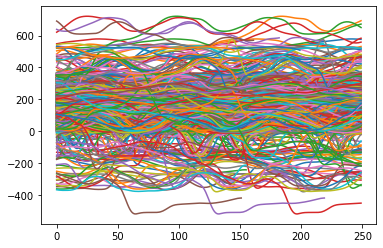

In [98]:
bla = dict_ridge_all['4mm']

values_list = list(bla.values())
key_list = list(bla.keys())

for i in np.arange(len(key_list)-1):
    TA_traj = values_list[i][3]
    step_L = values_list[i][4]
    #fig, ax1 = plt.subplots(1, 1, figsize=(25,15))
    for j, k in zip(np.arange(len(TA_traj)), np.arange(len(step_L))):
         #plt.plot(TA_traj[j])
         plt.plot(step_L[k])
         #plt.xlim(110, 150)

In [100]:
bla = dict_ridge_all['4mm']

values_list = list(bla.values())
key_list = list(bla.keys())

for i in np.arange(len(key_list)-1):
    TA_traj = values_list[i][11]
    #print(TA_traj)

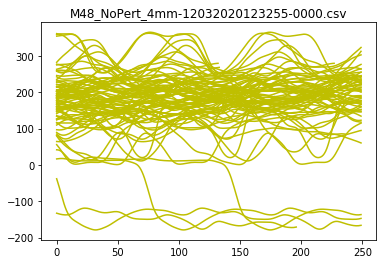

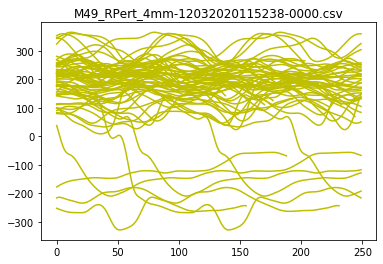

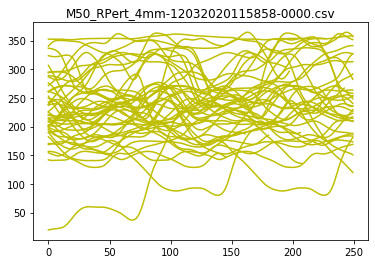

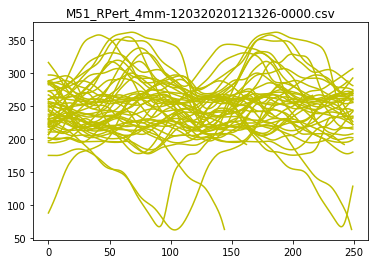

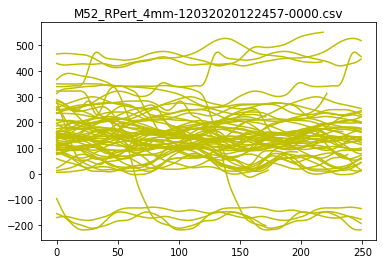

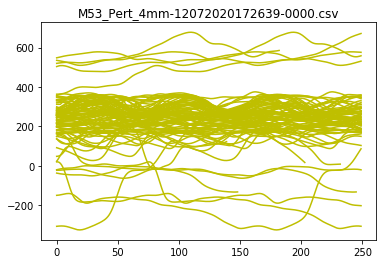

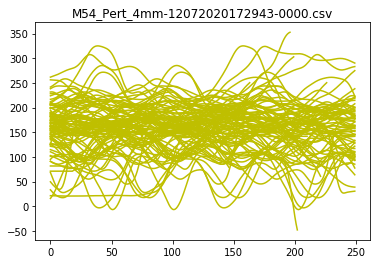

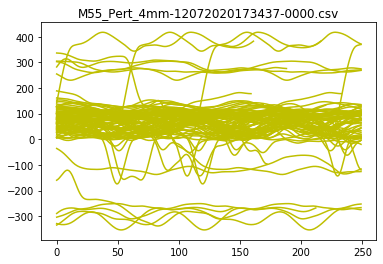

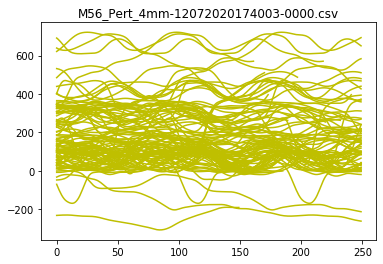

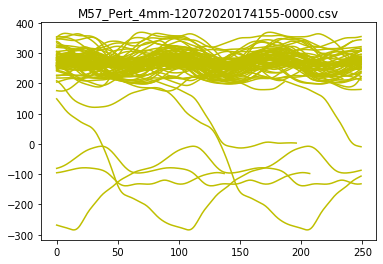

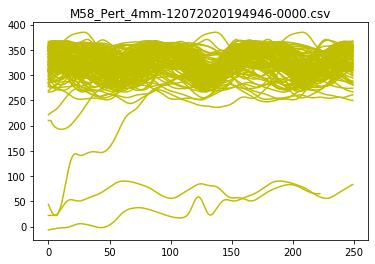

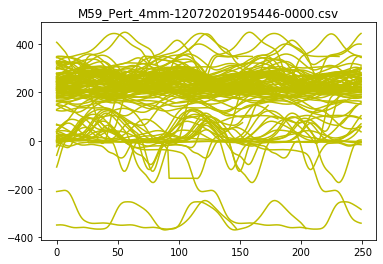

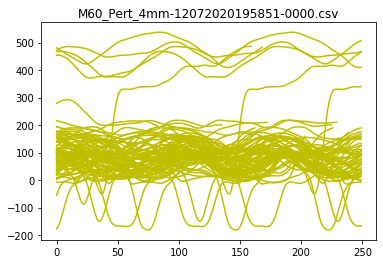

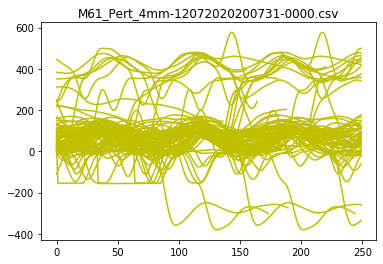

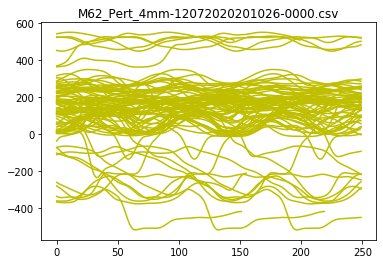

In [101]:
#PLOTS BEFORE PRE-PROCESS wrt R STEP
#Plot trials for a specific width where all trials from the same animal are plot in the same plot (tot 15 plots) 
MouseID_key = ['M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']

for i in np.arange(len(MouseID_key)):
    dict_ridge_Xwidth = dict_ridge_all['4mm']
    dict_ridge_XwidthXmouseID = dict(filter(lambda item: MouseID_key[i] in item[0], dict_ridge_Xwidth.items())) 
    values_list = list(dict_ridge_XwidthXmouseID.values())
    key_list = list(dict_ridge_XwidthXmouseID.keys()) 
#    fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
    fig = plt.figure()
    ax = fig.add_subplot(111)    
    for i in np.arange(len(key_list)):
        TA_traj_wrt_step = values_list[i][4]
        #print(TA_traj_wrt_step)
        for j in np.arange(len(TA_traj_wrt_step)):
            plt.plot(TA_traj_wrt_step[j] ,'y')
            plt.title("{i}".format(i = key_list[i]))
            #plt.ylim(200, 300)


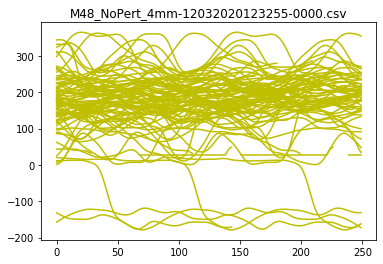

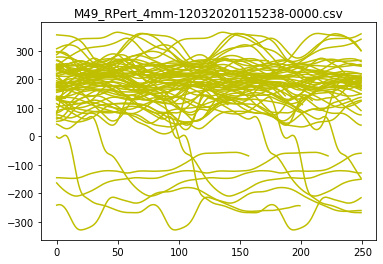

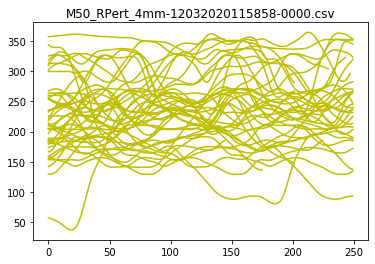

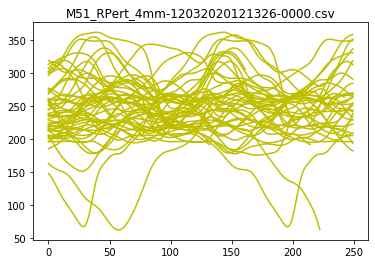

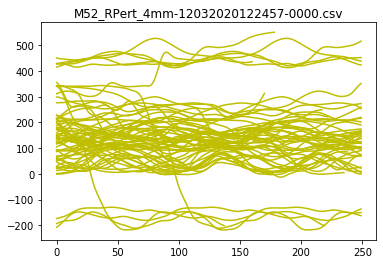

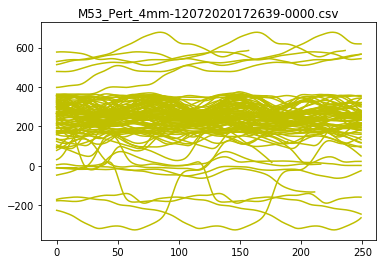

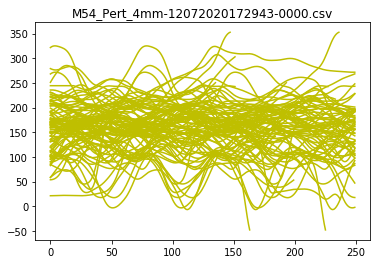

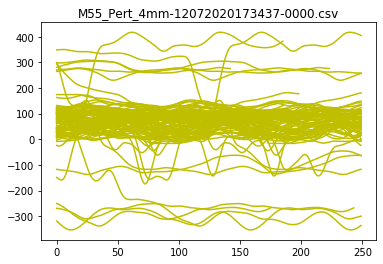

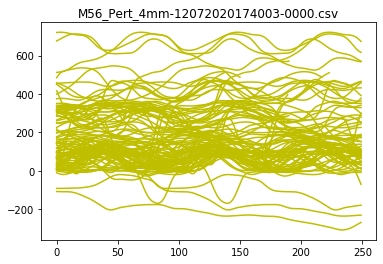

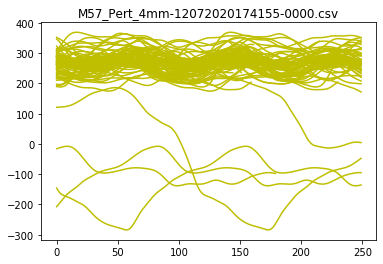

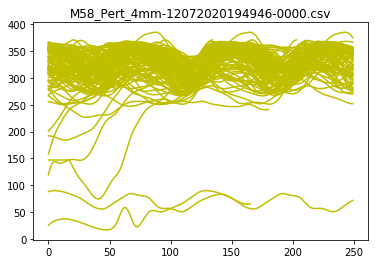

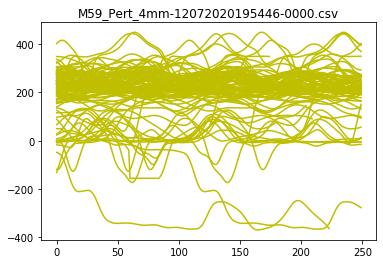

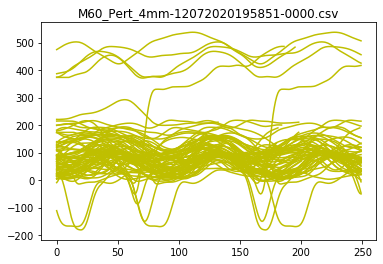

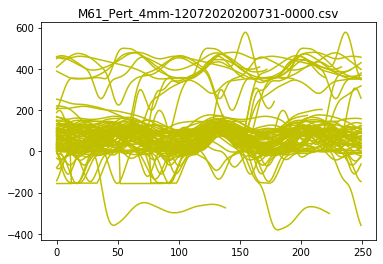

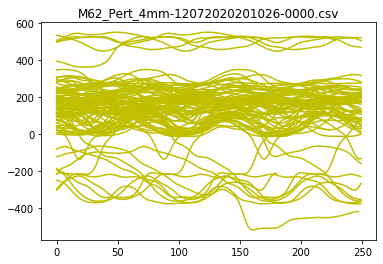

In [102]:
#PLOTS BEFORE PRE-PROCESS wrt L STEP
#Plot trials for a specific width where all trials from the same animal are plot in the same plot (tot 15 plots) 
MouseID_key = ['M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']

for i in np.arange(len(MouseID_key)):
    dict_ridge_Xwidth = dict_ridge_all['4mm']
    dict_ridge_XwidthXmouseID = dict(filter(lambda item: MouseID_key[i] in item[0], dict_ridge_Xwidth.items())) 
    values_list = list(dict_ridge_XwidthXmouseID.values())
    key_list = list(dict_ridge_XwidthXmouseID.keys()) 
#    fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
    fig = plt.figure()
    ax = fig.add_subplot(111)    
    for i in np.arange(len(key_list)):
        TA_traj_wrt_step = values_list[i][6]
        #print(TA_traj_wrt_step)
        for j in np.arange(len(TA_traj_wrt_step)):
            plt.plot(TA_traj_wrt_step[j] ,'y')
            plt.title("{i}".format(i = key_list[i]))
            #plt.ylim(200, 300)

In [103]:
def excludeTA_outrange(TA):
    if any(i < -30 or i > 250 for i in TA):
        TA = []
    return TA

In [104]:
def return_Mean_STD_forPSTH(array_value_dict):
    mean_array = np.nanmean(array_value_dict, axis = 0)
    STD_array = stats.sem(array_value_dict, nan_policy='omit')
    return mean_array, STD_array

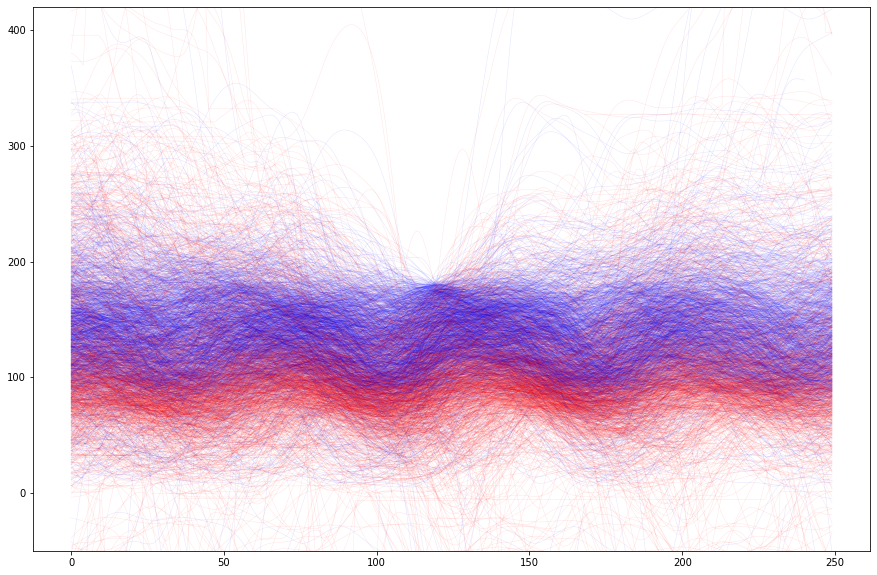

In [105]:
#### PLOT POST PROCESS
#Plot post-process TA wrt R step diff color for diff widths
search_key = ['10mm']#, '5mm']#, '8mm', '10mm']
fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
clrs = sns.color_palette("husl", len(MouseID_key))
mean_big_list = []
std_big_list = []
mean_small_list = []
std_small_list = []
mean_combo_list = []

a = 0
for k in np.arange(len(search_key)):    
    TA_up_thresh = []
    TA_below_thresh = []
    dict_ridge_Xwidth = dict_preprocessed_all[search_key[k]]
    values_list = list(dict_ridge_Xwidth.values())
    key_list = list(dict_ridge_Xwidth.keys()) 
    for i in np.arange(len(key_list)):
        TA_traj_wrt_step = values_list[i][-1]
        COMX_traj_wrt_step = values_list[i][-1] 
        for j in np.arange(len(TA_traj_wrt_step)):
            Tail_idx = 14
            Hip_idx = 13
            Tail_idx1 = 0
            Tail_idx2 = 3

            if len(COMX_traj_wrt_step[j][Tail_idx][Tail_idx1]):# Plot Tail Angle trajectory
                a = a+1
                #print(a)
                plt.plot(COMX_traj_wrt_step[j][Tail_idx][Tail_idx1] ,color = 'b', lw=0.5, alpha = 0.1)
                plt.ylim(-50,420)
                if len(COMX_traj_wrt_step[j][Tail_idx][Tail_idx1]) == 250:
                    TA_below_thresh.append(COMX_traj_wrt_step[j][Tail_idx][Tail_idx1])#(np.diff(COMX_traj_wrt_step[j][Tail_idx]))*0.5*(1/3)*49)#Ang Mom TA
            if len(COMX_traj_wrt_step[j][Tail_idx][Tail_idx2]): #Plot Hip Angle trajectory
                plt.plot(COMX_traj_wrt_step[j][Tail_idx][Tail_idx2] ,color = 'r', lw=0.5, alpha = 0.1)
                if len(COMX_traj_wrt_step[j][Tail_idx][Tail_idx2]) == 250:
                    TA_up_thresh.append(COMX_traj_wrt_step[j][Tail_idx][Tail_idx2])#(np.diff(COMX_traj_wrt_step[j][Hip_idx]))*20*0.5*4)#Ang Mom HA
    mean_big, std_big = return_Mean_STD_forPSTH(TA_up_thresh)
    mean_small, std_small = return_Mean_STD_forPSTH(TA_below_thresh)
    mean_big_list.append(mean_big)
    std_big_list.append(std_big)
    mean_small_list.append(mean_small)
    std_small_list.append(std_small)
    mean_combo_list.append(mean_small+mean_big)


In [106]:
def plot_PSTH_Mean_STD_label_color_pre_assigned(mean_array, std_array, ax, ls_param, label_strings):
    clrs = sns.color_palette("husl", len(mean_array))
    #label_strings = ['4mm', '5mm', '8mm', '10mm']#, 'Ipsi 4mm', 'Contra 4mm', 'Ipsi 4mm', 'Contra 4mm']
#    _, ax = plt.subplots(figsize=(12, 8))

    with sns.axes_style("darkgrid"):
        for i in range(len(mean_array)):
            epochs = list(range(len(mean_array[i])))
            ax.plot(epochs, mean_array[i], c=clrs[i], label = label_strings[i], ls = ls_param)
            ax.fill_between(epochs, mean_array[i]-std_array[i], mean_array[i]+std_array[i], \
                            alpha=0.3, facecolor=clrs[i])
            ax.legend(loc="lower left")
            ax.set_xlabel('Frame number (FR = 300 Hz)')
            ax.set_ylabel('Angular Momentum (g-cm2/s)')
            ax.axvline(125,0,360, color = 'red')
            #ax.axvline(140,0,360, color = 'red')

    return ax


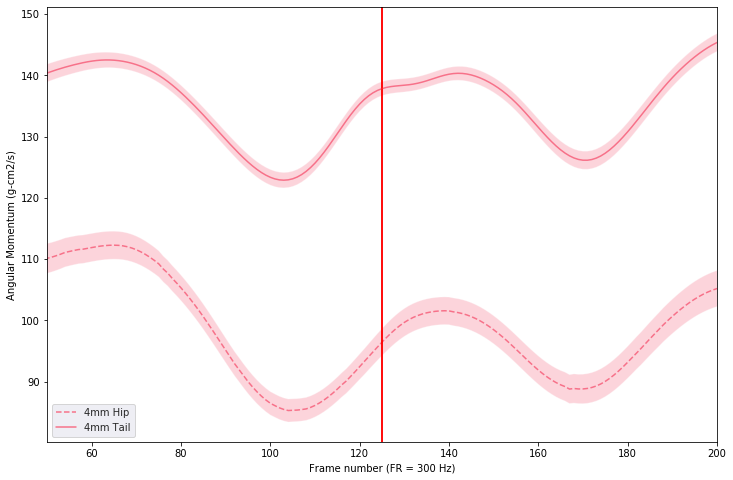

In [107]:
#CONTRA
_, ax = plt.subplots(figsize=(12, 8))
clrs = sns.color_palette("husl", 8)
label_strings_bl = ['4mm Hip', '5mm Hip', '8mm Hip', '10mm Hip']
label_strings_sl = ['4mm Tail', '5mm Tail', '8mm Tail', '10mm Tail']
ls_param_bl = '--'
ls_param_sl = '-'
ls_param_combo = 'dotted'
plot_PSTH_Mean_STD_label_color_pre_assigned(mean_big_list, std_big_list, ax, ls_param_bl, label_strings_bl) 
plot_PSTH_Mean_STD_label_color_pre_assigned(mean_small_list, std_small_list, ax, ls_param_sl, label_strings_sl)  
# plot_PSTH_Mean_STD_label_color_pre_assigned(mean_combo_list, \
#                                             std_small_list, ax, ls_param_combo, label_strings_sl)    

plt.xlim(50, 200)
plt.savefig('out')


In [108]:
########LOOK AT TAIL SEGMENTS DELAY IN NO PERT TRIALS

In [109]:
##### Assign TA list for each quadrant in dict
def compute_mean_values_insideDict(dict_traces_divided_on_TA_criteria, no_TA_segments):
    values_list = list(dict_traces_divided_on_TA_criteria.values())
    key_list = list(dict_traces_divided_on_TA_criteria.keys()) 
    dict_mean_quadrants = defaultdict(dict)
    for k in range(no_TA_segments):
        TA_traj_list = []
        for i in np.arange(len(key_list)):
            TA_traj_wrt_step = values_list[i][-1]
            for j in np.arange(len(TA_traj_wrt_step)):
                TA_traj = TA_traj_wrt_step[j][14][k][100:160]
                if len(TA_traj)== 60:
                    TA_traj_list.append(TA_traj)
        dict_mean_quadrants[k] = TA_traj_list
    return dict_mean_quadrants

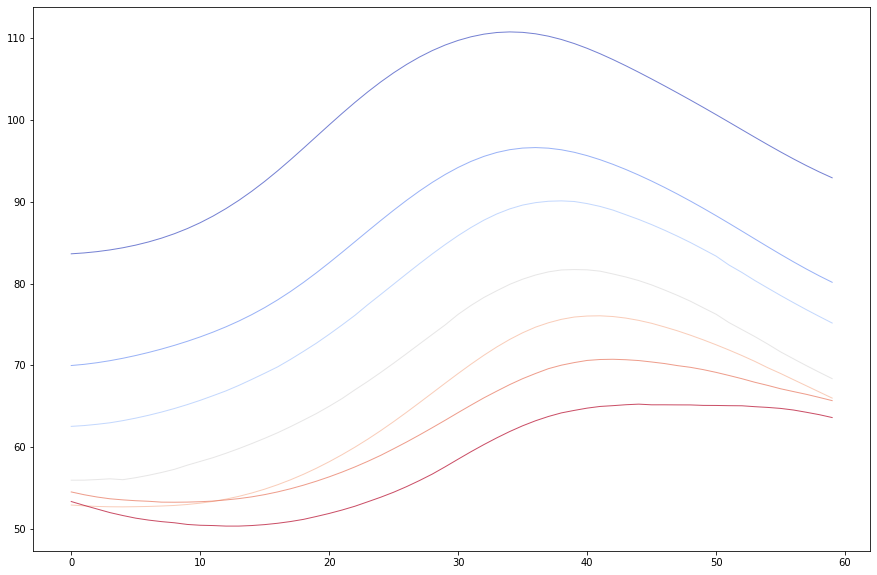

In [110]:
#Compute mean of values inside binned dictionary
no_TA_segments = 7
dict_mean_quadrants = compute_mean_values_insideDict(dict_preprocessed_all['4mm'], no_TA_segments)

#Plot means
values_list = list(dict_mean_quadrants.values())
key_list = list(dict_mean_quadrants.keys()) 
color_idx = np.linspace(0, 1, no_TA_segments)
fig, ax1 = plt.subplots(1, 1, figsize=(15,10))

for color_i, i in zip(color_idx, np.arange(no_TA_segments)):#len(key_list)):
    mean_quadrant_traces = np.nanmean(dict_mean_quadrants[i], axis=0)
    data = mean_quadrant_traces#-mean_quadrant_traces[130]
    #Plot here
    plt.plot(data, color=plt.cm.coolwarm(color_i), lw=1, alpha = 0.7, label="%s quadrant" % (i+1))
    #plt.ylim(50,300)
plt.show()

In [111]:
def get_delay_array(var1, var2):
    var1 = var1[~np.isnan(var1)] #centroid
    var2 = var2[~np.isnan(var2)] #TA
    #take the mean out
    var1 = var1-np.mean(var1)
    var2 = var2-np.mean(var2)

    corr_a_b = np.correlate(var1, var2, mode = 'full')
    #norm_corr_a_b = np.correlate(var2/np.std(var2), var1/np.std(var1), mode = 'full')
    cc_trace_midpoint = len(corr_a_b)
    delay = np.argmax(abs(corr_a_b))-(cc_trace_midpoint/2)+0.5 #Get the delay of the absolute max peak
    max_peak = max(corr_a_b)#, key=abs)
#    max_peak = abs(max(corr_a_b, key=abs))
    return delay, max_peak

In [112]:
def lag_finder(y1, y2, sr):#, ax2):
    n = len(y1)
    y1 = y1-np.nanmean(y1)
    y2 = y2-np.nanmean(y2)
    corr = signal.correlate(y2, y1, mode='same') / np.sqrt(signal.correlate(y1, y1, mode='same')[int(n/2)] * signal.correlate(y2, y2, mode='same')[int(n/2)])

    delay_arr = np.linspace(-0.5*n/sr, 0.5*n/sr, n)
    delay = delay_arr[np.argmax(corr)]
#     print('y2 is ' + str(delay) + ' behind y1')

#     ax2.plot(delay_arr, corr)
#     ax2.set_title('Lag: ' + str(np.round(delay, 3)) + ' s')
#     ax2.set_xlabel('Lag')
#     ax2.set_ylabel('Correlation coeff')
    #ax2.show()
    return delay

In [113]:
from scipy import signal
import scipy
#### PLOT POST PROCESS with scatterplot and cross-correlation
#Plot trials for a specific width where all trials from the same animal are plot in the same plot (tot 15 plots) 
search_key = ['4mm']#, '5mm', '8mm', '10mm']
sr = 300
Tail_idx = 14
Tail_idx1 = 0
Tail_idx2 = 2
dict_tail_seg = defaultdict(dict)

for t in np.arange(7):
    Lags_MaxHeight_list = []
    for k in np.arange(len(search_key)):    
        dict_ridge_Xwidth = dict_preprocessed_all[search_key[k]]
        values_list = list(dict_ridge_Xwidth.values())
        key_list = list(dict_ridge_Xwidth.keys()) 
        for i in np.arange(len(key_list)):
            TA_traj_wrt_step = values_list[i][-1]
            COMX_traj_wrt_step = values_list[i][-1] 
            for j in np.arange(len(TA_traj_wrt_step)):
                if len(COMX_traj_wrt_step[j][Tail_idx][t]) == 250 and \
                len(COMX_traj_wrt_step[j][Tail_idx][0]) == 250:
                    var1 = COMX_traj_wrt_step[j][Tail_idx][0]#[100:160]
                    var2 = COMX_traj_wrt_step[j][Tail_idx][t]#[110:170]
                    #Compute and plot cross-corr
    #                 fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15,6))
    #                 ax1.plot(var1 , 'y')
    #                 ax1.plot(var2, 'k' )
                    #ax2.set_xlim(248, 250)
                    #ax2.set_ylim(4000000, 5000000)
                    delay = lag_finder(var1, var2, sr)#, ax2)
                    if delay >-500:
                        Lags_MaxHeight_list.append(delay)
    dict_tail_seg[t] = Lags_MaxHeight_list

In [114]:
#Save values into dict

data = dict_tail_seg
import pandas as pd

(pd.DataFrame.from_dict(data=data, orient='index')
   .to_csv('dict_file_TA_tc.csv', header=False))

In [115]:
def plot_hist_norm_fit(data):
    from scipy.stats import norm
    binsize = 100
    fig, axs = plt.subplots(2, 2, figsize=(15,10))
    kwargs = dict(histtype='bar', alpha=0.1, density=False, bins=binsize, ec="k")
    for i in np.arange(len(data)):
        mu, std = norm.fit(dict_tail_seg[i])
        # Plot the PDF.
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)
        axs[0, 0].plot(x, p, linewidth=2, label = i)
        axs[0, 0].hist(dict_tail_seg[i], **kwargs)
        #axs[0,0].set_xlim(0, 0.5)
        #axs[0,0].set_ylim(0, 10)
        axs[0, 0].legend(loc='upper right')


C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1720: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


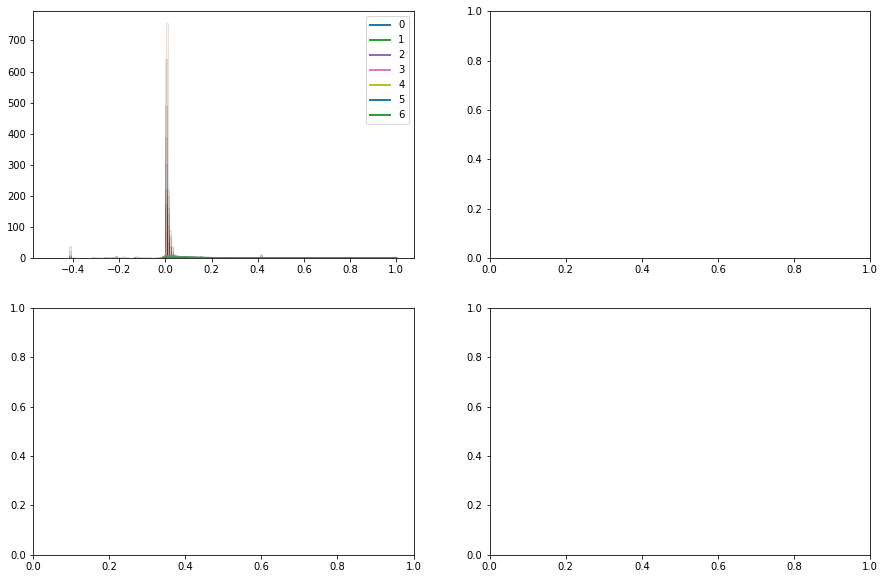

In [116]:
plot_hist_norm_fit(dict_tail_seg)

Text(0.5, 1.0, 'Passive Tail hist')

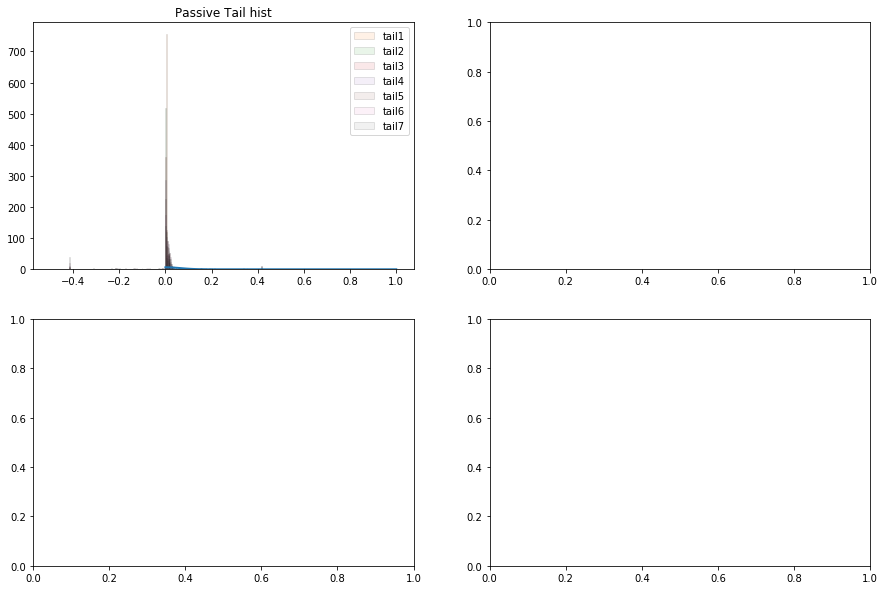

In [117]:
from scipy.stats import norm
binsize = 300


fig, axs = plt.subplots(2, 2, figsize=(15,10))
kwargs = dict(histtype='bar', alpha=0.1, density=False, bins=binsize, ec="k") #edgecolor black (k)
# Fit a normal distribution to the data:
mu, std = norm.fit(dict_tail_seg[1])
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axs[0, 0].plot(x, p, linewidth=2)
#pos_peaks_list = np.array([item for item in dict_tail_seg[1] if item>0.0017])
axs[0, 0].hist(dict_tail_seg[0], **kwargs, label = 'tail1')
axs[0, 0].hist(dict_tail_seg[1], **kwargs, label = 'tail2')
axs[0, 0].hist(dict_tail_seg[2], **kwargs, label = 'tail3')
axs[0, 0].hist(dict_tail_seg[3], **kwargs, label = 'tail4')
axs[0, 0].hist(dict_tail_seg[4], **kwargs, label = 'tail5')
axs[0, 0].hist(dict_tail_seg[5], **kwargs, label = 'tail6')
axs[0, 0].hist(dict_tail_seg[6], **kwargs, label = 'tail7')
axs[0, 0].legend(loc='upper right')
axs[0, 0].set_title('Passive Tail hist')
#axs[0,0].set_xlim(0, 0.05)